# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: Daffon, David D. \
_Student No._: 2021-04594 \
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** 

I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

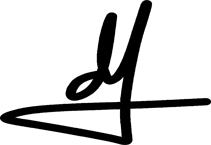

In [287]:
from IPython.display import Image #run cell to display e-sig
Image(filename="sig.png")

**DAVID D. DAFFON**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [288]:
# preliminaries: importing all the libraries I need
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import model_selection, metrics

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


Text(0.5, 1.0, 'Toy data set 1')

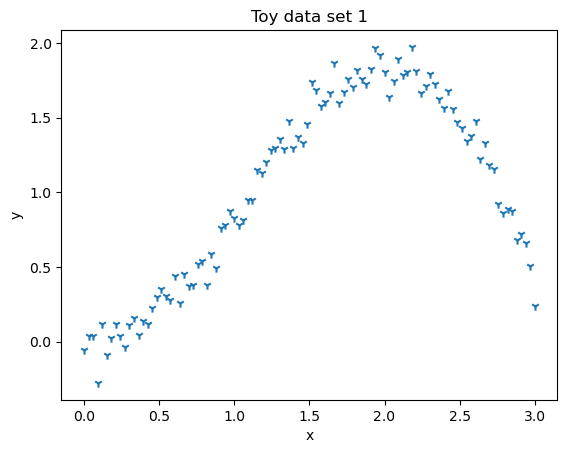

In [298]:
x = np.linspace(0, 3, 100) # creating 100 regularly-spaced points from 0 to 3 as values of x
eps = np.random.normal(0, 0.1, 100) # creating 100 random points (from the normal distribution), this serves as our source of 'noise'

def f(x): # defining the function according to Eq. 8.75
  return x*np.sin(x) + eps

y = f(x) # storing output as  variable y

plt.scatter(x, y, marker='1') # plotting
plt.xlabel('x')
plt.ylabel('y')
plt.title("Toy data set 1")

### Author's note

I create a data set that follows Eq. 8.75, wherein it follows a xsin(x) function but we introduce a 'noise' term to simulate a 'real' data set. Obviously generating straight in Python will make it too clean and render RMSE useless.  Note that since I use np.random.normal without a seed, every run instance will return a slightly different toy data set. 

### PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


In [290]:
x_train, x_testi, y_train, y_testi = model_selection.train_test_split(x, y, test_size=0.5, random_state=100) # splitting data set into training and non-training
x_testf, x_cvad, y_testf, y_cvad = model_selection.train_test_split(x_testi, y_testi, test_size=0.5, random_state=100) # splitting remaining into training and cvad

Text(0.5, 1.0, 'Best fit lines over the toy data set')

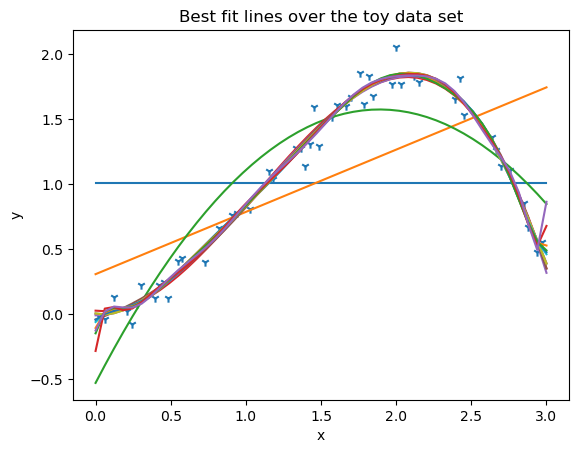

In [291]:
polyline = np.linspace(0, 3, 50) # creating linspace with same dimensions as training data set (50% of 100 data points)
model_array = [] # empty list for storing iteration results

for i in np.arange(0, 15, 1): # creating  best fit curves from degree 0 to 14 using a for loop for efficiency
  model = np.poly1d(np.polyfit(x_train, y_train, i))
  model_array.append(model(polyline))
  plt.plot(polyline, model_array[i])

plt.scatter(x_train, y_train, marker="1") # plotting
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best fit lines over the toy data set')

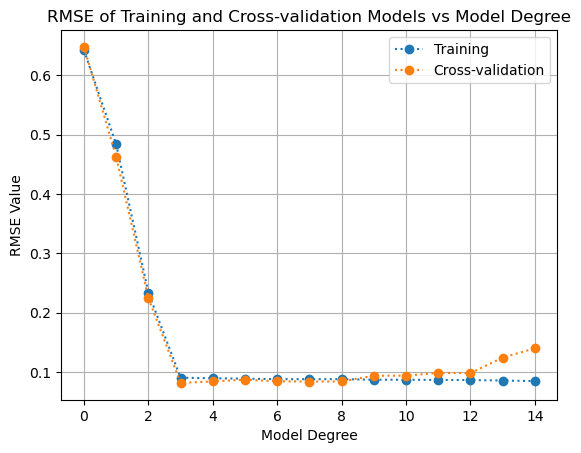

In [292]:
polyline2 = np.linspace(0, 3, 25) #create linspace with same dimensions as training and cvad (25% of 100 data points)
model_array2 = [] #empty lists to store iteration results
model_array3 = []
metrics_train_list = []
metrics_cvad_list = []

for i in np.arange(0, 15, 1): #creating, but not plotting best fit model from degree 0 to 14 using for loop for efficiency
  model = np.poly1d(np.polyfit(x_train, y_train, i))
  model_array2.append(model(x_train))
  model_array3.append(model(x_cvad))

for j in np.arange(0, 15, 1): # taking the rmse of each best fit model for training and cross validation data subsets
  metrics_train_list.append(metrics.mean_squared_error(y_train, model_array2[j], squared=False))
  metrics_cvad_list.append(metrics.mean_squared_error(y_cvad, model_array3[j], squared=False))

plt.plot(np.arange(0, 15, 1), metrics_train_list, label='Training', marker='o', linestyle='dotted') # plotting
plt.plot(np.arange(0, 15, 1), metrics_cvad_list, label='Cross-validation', marker='o', linestyle='dotted')
plt.grid()
plt.title('RMSE of Training and Cross-validation Models vs Model Degree')
plt.xlabel('Model Degree')
plt.ylabel('RMSE Value')
plt.legend()

## Further exploration
Let us explore the effect of increasing the standard deviation in our data set. I create a data set 2 where I increase the stdev of the 'noise' term to 0.5 from 0.1.

Text(0.5, 1.0, 'Toy data set 2')

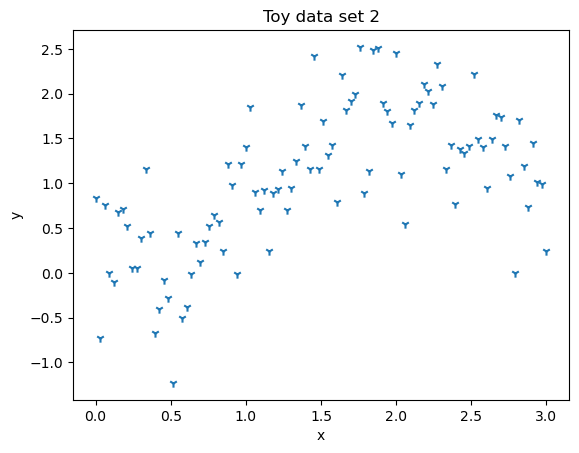

In [293]:
x2 = np.linspace(0, 3, 100) # creating 100 regularly-spaced points from 0 to 3 as values of x
eps2 = np.random.normal(0, 0.5, 100) # creating 100 random points (from the normal distribution), but this time with stdev of 0.5

def f2(x2): # defining the function according to Eq. 8.75
  return x2*np.sin(x2) + eps2

y2 = f2(x2) # storing output as  variable y

plt.scatter(x2, y2, marker='1') # plotting
plt.xlabel('x')
plt.ylabel('y')
plt.title("Toy data set 2")

Even by eyeballing it, we can already see how data 2 is more 'noisy' than data set 1. We examine this further.

### Author's note

Hereon we follow the same process, only with variable names changed (and so comments are removed to avoid redundance).

In [294]:
x2_train, x2_testi, y2_train, y2_testi = model_selection.train_test_split(x2, y2, test_size=0.5, random_state=100) 
x2_testf, x2_cvad, y2_testf, y2_cvad = model_selection.train_test_split(x_testi, y_testi, test_size=0.5, random_state=100)

Text(0.5, 1.0, 'Best fit lines over the toy data set')

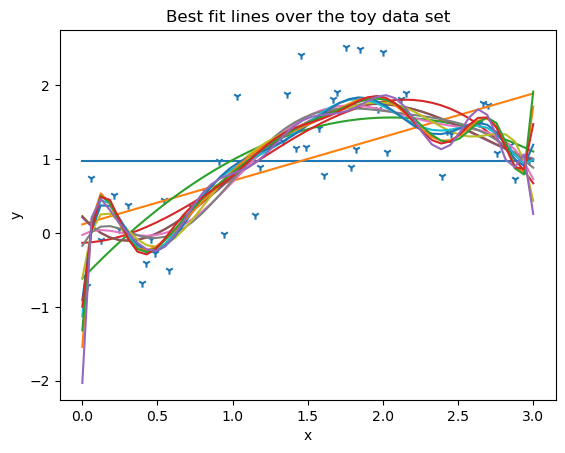

In [295]:
polyline = np.linspace(0, 3, 50)
model_array = []

for i in np.arange(0, 15, 1):
  model = np.poly1d(np.polyfit(x2_train, y2_train, i))
  model_array.append(model(polyline))
  plt.plot(polyline, model_array[i])

plt.scatter(x2_train, y2_train, marker="1")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best fit lines over the toy data set')

### Author's note

A fascinating phenomenon here is that in our higher degree fitting, the best fit curves are 'tricked' by the noise more than in the previous data set. At the same time, the greater standard deviation in the 'noise' increases the RMSE values  of the training models as a whole. There is 'more error' as compared to data set 1. 

A fascinating trend is how the RMSE for the cvad models is actually *lower* in the lower degree fitting, but seems to exponentially increase in higher degrees. To confirm this, I extend the fitting up to degree 20.

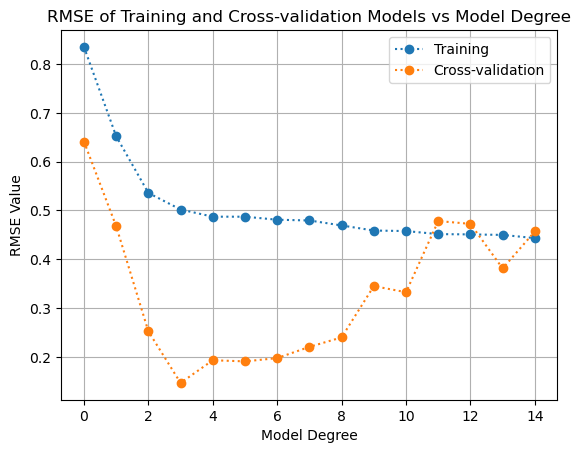

In [296]:
polyline2 = np.linspace(0, 3, 25)
model_array2 = []
model_array3 = []
metrics_train_list = []
metrics_cvad_list = []

for i in np.arange(0, 15, 1):
  model = np.poly1d(np.polyfit(x2_train, y2_train, i))
  model_array2.append(model(x2_train))
  model_array3.append(model(x2_cvad))

for j in np.arange(0, 15, 1):
  metrics_train_list.append(metrics.mean_squared_error(y2_train, model_array2[j], squared=False))
  metrics_cvad_list.append(metrics.mean_squared_error(y2_cvad, model_array3[j], squared=False))

plt.plot(np.arange(0, 15, 1), metrics_train_list, label='Training', marker='o', linestyle='dotted')
plt.plot(np.arange(0, 15, 1), metrics_cvad_list, label='Cross-validation', marker='o', linestyle='dotted')
plt.grid()
plt.title('RMSE of Training and Cross-validation Models vs Model Degree')
plt.xlabel('Model Degree')
plt.ylabel('RMSE Value')
plt.legend()

c:\Users\David\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\David\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


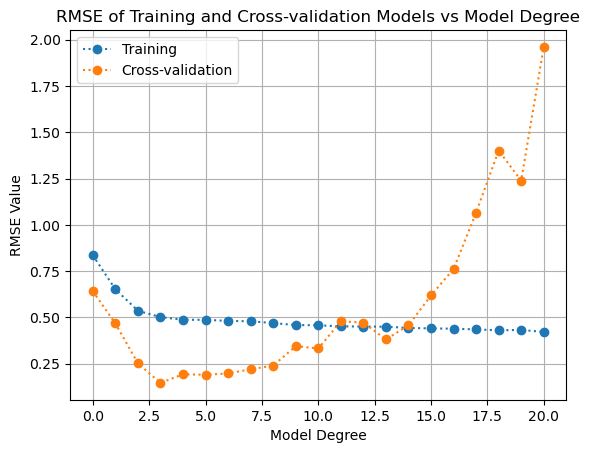

In [297]:
polyline2 = np.linspace(0, 3, 25)
model_array2 = []
model_array3 = []
metrics_train_list = []
metrics_cvad_list = []

for i in np.arange(0, 21, 1):
  model = np.poly1d(np.polyfit(x2_train, y2_train, i))
  model_array2.append(model(x2_train))
  model_array3.append(model(x2_cvad))

for j in np.arange(0, 21, 1):
  metrics_train_list.append(metrics.mean_squared_error(y2_train, model_array2[j], squared=False))
  metrics_cvad_list.append(metrics.mean_squared_error(y2_cvad, model_array3[j], squared=False))

plt.plot(np.arange(0, 21, 1), metrics_train_list, label='Training', marker='o', linestyle='dotted')
plt.plot(np.arange(0, 21, 1), metrics_cvad_list, label='Cross-validation', marker='o', linestyle='dotted')
plt.grid()
plt.title('RMSE of Training and Cross-validation Models vs Model Degree')
plt.xlabel('Model Degree')
plt.ylabel('RMSE Value')
plt.legend()

As we expected, when we extend the model degrees up to 20, the trend of overfitting is much more apparent than in the first data set. 